In [36]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [37]:
path='result 22\\B -3'
files=os.listdir(path)

In [38]:
df_list=[]
for file in files:
    if file.endswith('.csv'):
        data=pd.read_csv(path+'\\'+file)
        df_list.append(data)

In [39]:
# for df in df_list:
#     print(f"{df['p_diff'].mean():.2f},len:{len(df['p_diff'].dropna())}")

In [40]:
# 从df_list中取出第一个DataFrame作为基础DataFrame
base_df = df_list[0]

# 对df_list中的其余每个DataFrame进行迭代
for df in df_list[1:]:
    # 使用set_index方法将当前DataFrame和基础DataFrame设置为相同的索引
    df = df.set_index(['x', 'y', 'ring', 'p'])
    base_df = base_df.set_index(['x', 'y', 'ring', 'p'])
    
    # 使用combine_first方法将当前DataFrame的值填充到基础DataFrame中的NaN值
    base_df = base_df.combine_first(df)
    
    # 重置基础DataFrame的索引
    base_df = base_df.reset_index()


In [41]:
new_filename=path+".csv"
base_df.to_csv(new_filename, index=False)

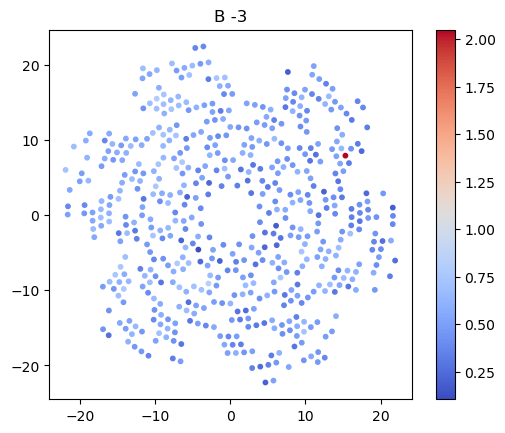

In [42]:
x=base_df['x']
y=base_df['y']
p_diff=base_df['p_diff']
fig,ax=plt.subplots()
# 颜色映射
# color min=0, max=1
cmap = 'coolwarm'
# norm = colors.Normalize(vmin=0, vmax=1)

sc = ax.scatter(x, y, c=np.abs(p_diff), cmap=cmap, s=10)
ax.set_aspect('equal')
fig.colorbar(sc,ax=ax)
ax.set_title(path.split('\\')[-1])
plt.show()

